In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
Lx, Ly = 1.0, 1.0
Nx, Ny = 30, 30
c = 1.0
T = 2.0

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
Dx = x[1] - x[0]
Dy = y[1] - y[0]
Dt = 0.4 * min(Dx, Dy) / c / 8
Nt = int(T / Dt)
X, Y = np.meshgrid(x, y, indexing='ij')

def compute_total_energy(u, u_old, Dx, Dy, Dt, c):
    kinetic = ((u - u_old)/Dt)**2
    grad_x = (np.roll(u, -1, axis=0) - np.roll(u, 1, axis=0)) / (2 * Dx)
    grad_y = (np.roll(u, -1, axis=1) - np.roll(u, 1, axis=1)) / (2 * Dy)
    potential = c**2 * (grad_x**2 + grad_y**2)
    return 0.5 * np.sum(kinetic + potential) * Dx * Dy

def sine_modulated_wave():
    u = np.sin(2 * np.pi * X / Lx) * np.exp(-100 * (Y - Ly/2)**2)
    u_old = u - Dt * c * (2 * np.pi / Lx) * np.cos(2 * np.pi * X / Lx) * np.exp(-100 * (Y - Ly/2)**2)
    return u, u_old

def diagonal_wave_packet():
    u = np.exp(-100 * ((X - 0.25*Lx - 0.25*Y)**2 + (Y - 0.25*Ly - 0.25*X)**2)) * np.sin(4 * np.pi * (X + Y))
    u_old = np.copy(u)
    return u, u_old

def ring_disturbance():
    r = np.sqrt((X - Lx/2)**2 + (Y - Ly/2)**2)
    u = np.exp(-100 * (r - 0.2)**2)
    u_old = np.copy(u)
    return u, u_old

initial_conditions = [
    ("sine_modulated_wave", sine_modulated_wave),
    ("diagonal_wave_packet", diagonal_wave_packet),
    ("ring_disturbance", ring_disturbance)
]

def run_simulation(name, init_func):
    u, u_old = init_func()
    u_new = np.zeros_like(u)
    frames, energies, times = [], [], []

    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            laplace = ((u[i+1, j] - 2*u[i, j] + u[i-1, j]) / Dx**2 +
                       (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / Dy**2)
            u_new[i, j] = u[i, j] + 0.5 * Dt**2 * c**2 * laplace

    frames.append(u.copy())

    for n in range(1, Nt):
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                laplace = ((u[i+1, j] - 2*u[i, j] + u[i-1, j]) / Dx**2 +
                           (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / Dy**2)
                u_new[i, j] = 2*u[i, j] - u_old[i, j] + Dt**2 * c**2 * laplace

        u_old[:], u[:] = u[:], u_new[:]

        if n % 10 == 0:
            frames.append(u.copy())
            energy = compute_total_energy(u, u_old, Dx, Dy, Dt, c)
            energies.append(energy)
            times.append(n * Dt)

    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111, projection='3d')
    surf = [ax.plot_surface(X, Y, frames[0], cmap='viridis', vmin=-1, vmax=1)]
    ax.set_zlim(-1, 1)

    def animate(i):
        surf[0].remove()
        surf[0] = ax.plot_surface(X, Y, frames[i], cmap='viridis', vmin=-1, vmax=1)
        return surf[0],

    ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=200, blit=False)
    ani.save(f"wave_{name}.mp4", writer="ffmpeg")
    plt.close()

In [ ]:
for name, init_func in initial_conditions:
    run_simulation(name, init_func)

Running simulation for: sine_modulated_wave
Running simulation for: diagonal_wave_packet
Running simulation for: ring_disturbance


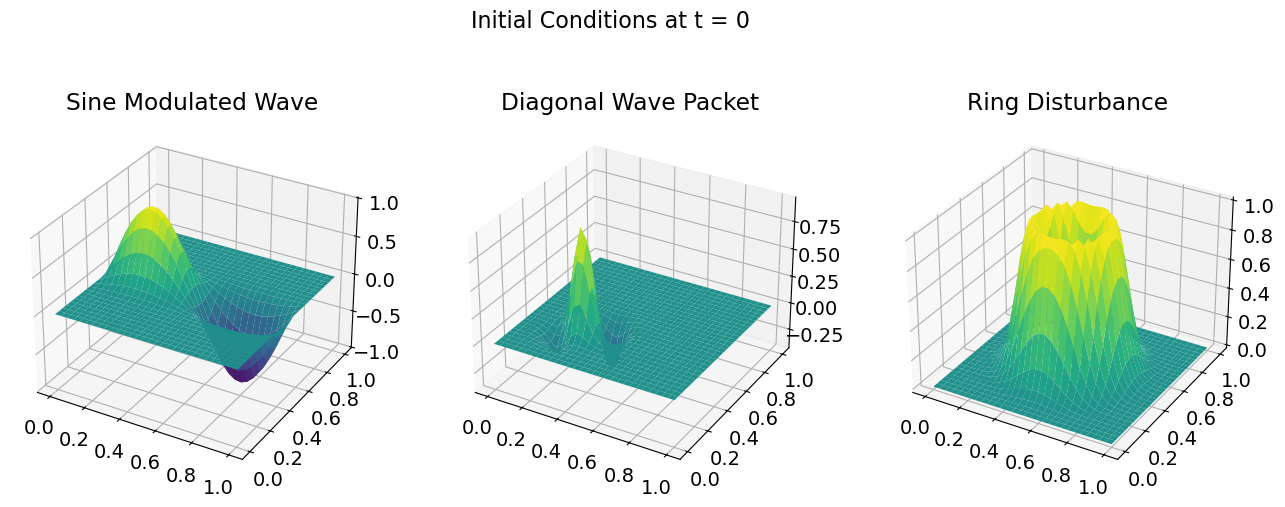

In [ ]:
# Frame 1
fig = plt.figure(figsize=(16, 6))

for idx, (name, init_func) in enumerate(initial_conditions):
    u0, _ = init_func()
    ax = fig.add_subplot(1, 3, idx + 1, projection='3d')
    surf = ax.plot_surface(X, Y, u0, cmap='viridis', vmin=-1, vmax=1)
    ax.set_title(name.replace('_', ' ').title())

plt.suptitle("Initial Conditions at t = 0", fontsize=16)
plt.savefig("initial_conditions_3d_summary.png", dpi=150)
plt.show()


Long plot.

In [ ]:
Lx, Ly = 1.0, 2.0        # size
Nx, Ny = 40, 80        # number of grid points
c = 1.0                  # wave speed
T = 2.0                  # total time

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
Dx = x[1] - x[0]
Dy = y[1] - y[0]
Dt = 0.4 * min(Dx, Dy) / c / 8
Nt = int(T / Dt)

# Initialize empty fields
u = np.zeros((Nx, Ny))
u_new = np.zeros((Nx, Ny))
u_old = np.zeros((Nx, Ny))

# Initial condition: right-traveling sine-modulated wave
X, Y = np.meshgrid(x, y, indexing='ij')
u = np.sin(2 * np.pi * X / Lx) * np.exp(-100 * (Y - Ly/2)**2)
u_old = u - Dt * c * (2 * np.pi / Lx) * np.cos(2 * np.pi * X / Lx) * np.exp(-100 * (Y - Ly/2)**2)

# Solve IVBP
frames = []
energies = []
times = []

for i in range(1, Nx-1):
    for j in range(1, Ny-1):
        laplace = ((u[i+1, j] - 2*u[i, j] + u[i-1, j]) / Dx**2 +
                   (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / Dy**2)
        u_new[i, j] = u[i, j] + 0.5 * Dt**2 * c**2 * laplace

frames.append(u.copy())

for n in range(1, Nt):
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            laplace = ((u[i+1, j] - 2*u[i, j] + u[i-1, j]) / Dx**2 +
                       (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / Dy**2)
            u_new[i, j] = 2*u[i, j] - u_old[i, j] + Dt**2 * c**2 * laplace

    u_old[:], u[:] = u[:], u_new[:]

    if n % 10 == 0:
        frames.append(u.copy())
        energy = compute_total_energy(u, u_old, Dx, Dy, Dt, c)
        energies.append(energy)
        times.append(n * Dt)

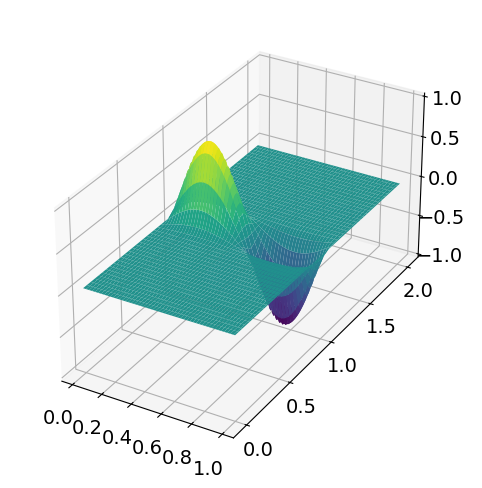

In [ ]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_box_aspect([1, 2, 1])
surf = ax.plot_surface(X, Y, frames[0], cmap='viridis', vmin=-1, vmax=1)

plt.show()


In [36]:
# Create figure and 3D axes
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 2, 1])  # Equal aspect ratio for x, y, z

surf = [ax.plot_surface(X, Y, frames[0], cmap='viridis', vmin=-1, vmax=1)]
ax.set_zlim(-1, 1)
def animate(i):
    surf[0].remove()
    surf[0] = ax.plot_surface(X, Y, frames[i], cmap='viridis', vmin=-1, vmax=1)
    return surf[0],

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=100, blit=False)

ani.save("wide_wave_propagation_3d.mp4", writer="ffmpeg")
plt.close()
